In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train), (X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 26s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train=y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [75]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X_train[3])
    plt.xlabel(classes[y[index]])

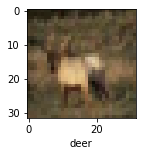

In [76]:
plot_sample(X_train,y_train,3)

In [26]:
X_train=X_train/255
X_test=X_test/255

In [38]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000,activation='relu'),
        layers.Dense(1000,activation='relu'),
        layers.Dense(10,activation='sigmoid')
    ])
ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)
      

Epoch 1/5
1563/1563 [==============================] - 95s 59ms/step - loss: 1.8146 - accuracy: 0.3536
Epoch 2/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6262 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.5457 - accuracy: 0.4550
Epoch 4/5
1563/1563 [==============================] - 85s 55ms/step - loss: 1.4839 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 387s 247ms/step - loss: 1.4364 - accuracy: 0.4952


In [39]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 13s 26ms/step - loss: 1.4983 - accuracy: 0.4689


[1.4982856512069702, 0.46889999508857727]

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('classification Report:\n',classification_report(y_test,y_pred_classes))

classification Report:
               precision    recall  f1-score   support

           0       0.69      0.30      0.42      1000
           1       0.68      0.52      0.59      1000
           2       0.31      0.52      0.39      1000
           3       0.31      0.47      0.37      1000
           4       0.46      0.31      0.37      1000
           5       0.49      0.25      0.33      1000
           6       0.56      0.50      0.53      1000
           7       0.49      0.63      0.55      1000
           8       0.48      0.74      0.58      1000
           9       0.66      0.45      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.51      0.47      0.47     10000
weighted avg       0.51      0.47      0.47     10000



In [45]:
cnn = models.Sequential([
    
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
    
        layers.Flatten(),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax'),
        
    ])

In [88]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train,y_train,epochs=10)
      

Epoch 1/10
1563/1563 [==============================] - 42s 25ms/step - loss: 0.8980 - accuracy: 0.6888
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8540 - accuracy: 0.7042
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8183 - accuracy: 0.7165
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7893 - accuracy: 0.7262
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7563 - accuracy: 0.7383
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7335 - accuracy: 0.7454
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7097 - accuracy: 0.7537
Epoch 8/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.6860 - accuracy: 0.7598
Epoch 9/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.6654 - accuracy: 0.7681
Epoch 10/10
1563/1563 [==============================] - 40s 26m

In [91]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 20ms/step - loss: 0.9425 - accuracy: 0.6885


[0.9424773454666138, 0.6884999871253967]

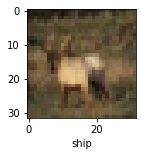

In [94]:
plot_sample(X_test,y_test,2)

In [95]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[6.4098254e-05, 1.2197636e-05, 2.3129683e-03, 9.0760064e-01,
        9.5887139e-05, 8.6678594e-02, 2.2179582e-03, 8.6438531e-06,
        9.7035896e-04, 3.8665650e-05],
       [4.4357333e-02, 6.9653496e-02, 7.4799056e-05, 1.9206842e-08,
        1.7334562e-05, 9.9445707e-10, 1.9398472e-08, 4.2867212e-09,
        8.8253760e-01, 3.3594954e-03],
       [2.4942961e-02, 7.6016837e-01, 1.0721155e-04, 2.0117125e-04,
        1.2500373e-04, 2.2286184e-05, 4.2641008e-05, 7.0815891e-05,
        1.8946382e-01, 2.4855653e-02],
       [8.9697319e-01, 2.6151282e-04, 6.2900214e-03, 2.2896929e-04,
        2.6015195e-03, 1.6552054e-06, 3.9513612e-05, 1.3596626e-04,
        9.3395092e-02, 7.2554561e-05],
       [1.3476847e-07, 4.5786855e-06, 1.7779102e-03, 3.3371922e-02,
        8.5350722e-01, 2.4938674e-03, 1.0878741e-01, 2.6153995e-05,
        3.0558371e-05, 2.2817837e-07]], dtype=float32)

In [96]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [97]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [98]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

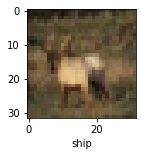

In [101]:
plot_sample(X_test,y_test,2)

In [102]:
classes[y_classes[2]]

'automobile'